# Scan aerosols 
=========================


- Sylvie Dagoret-Campagne
- Affiliation LAL-IN2P3-CNRS
- Work : LSST & StarDice
- date December 1st 2017


In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import os
import re 

In [3]:
import astropy.units as u

In [4]:
from scipy.interpolate import interp1d

In [5]:
import sys
sys.path.append('../libradtransim')

In [6]:
import libsimulateTranspLSSTScattAbsAer as atm

In [7]:
#help(atm)

In [8]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
#          'figure.figsize': (6, 4),
         'figure.figsize': (16, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Read atmosphere

In [9]:
tau_aerosol=np.linspace(0.,0.5,10)
lambda0_aerosol=500. # nm
airmass=1.
pwv=4.0     # mm
ozone=0. # DU

In [10]:
path,thefile=atm.ProcessSimulation(airmass,pwv,ozone) 
fullfilename=os.path.join(path,thefile)
atm_data=np.loadtxt(fullfilename)
wl_atm0=atm_data[:,0]
tr_atm0=atm_data[:,1]  

--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0.INP')
('Output to file                : ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0.OUT')
('uvspec cmd: ', '/Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0.INP > simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0.OUT')


In [11]:
all_wl_atm= []
all_tr_atm= []

for tau in tau_aerosol:
      path,thefile=atm.ProcessSimulationaer(airmass,pwv,ozone,lambda0_aerosol,tau) 
      fullfilename=os.path.join(path,thefile)
      atm_data=np.loadtxt(fullfilename)
      wl_atm=atm_data[:,0]
      tr_atm=atm_data[:,1]  
      all_wl_atm.append(wl_atm) 
      all_tr_atm.append(tr_atm) 

--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) wl0 =  500.0
 5) tau0 =  0.0
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer0.INP')
('Output to file                : ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer0.OUT')
('uvspec cmd: ', '/Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer0.INP > simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer0.OUT')
--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) wl0 =  500.0
 5) tau0 =  0.0555555555556
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer5.INP')
('Output to file                : 

### bind together wavelength and transmission

In [12]:
wl_and_tr_atm=zip(all_wl_atm,all_tr_atm)  

## plot air-transmission

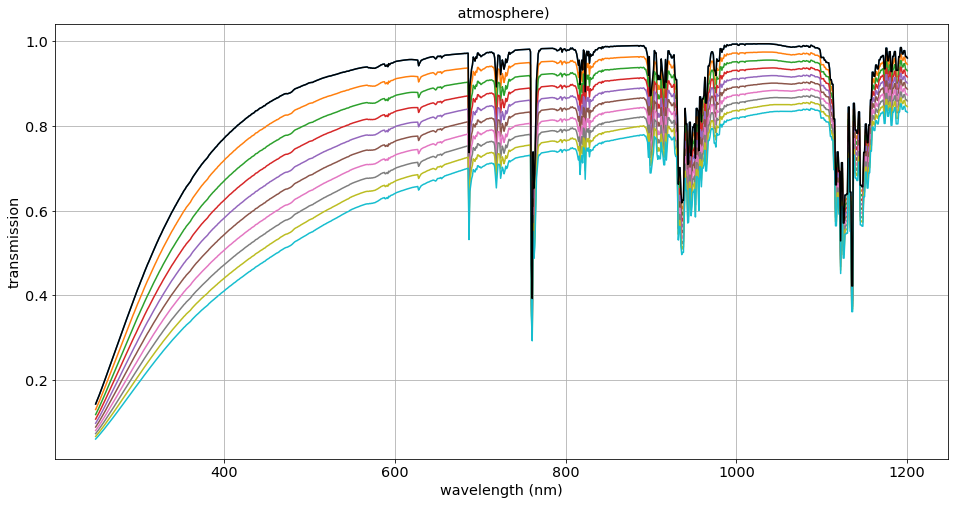

In [13]:
for wl_atm,tr_atm in wl_and_tr_atm:
    plt.plot(wl_atm,tr_atm)
plt.plot(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title(" atmosphere)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.savefig("atm-transm.png")

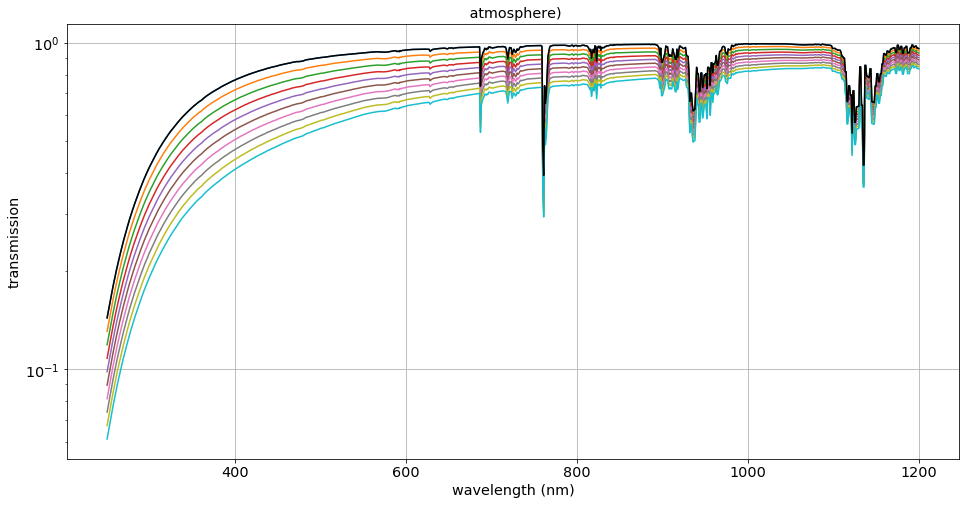

In [14]:
for wl_atm,tr_atm in wl_and_tr_atm:
    plt.semilogy(wl_atm,tr_atm)
plt.semilogy(wl_atm0,tr_atm0,'k')
plt.grid()
plt.title(" atmosphere)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.savefig("atm-transm.png")

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


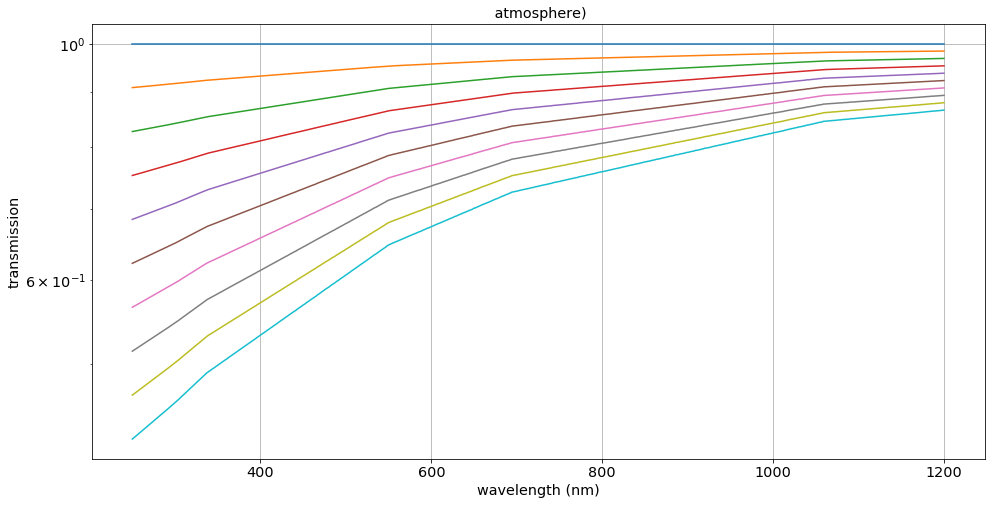

In [15]:
for wl_atm,tr_atm in wl_and_tr_atm:
    plt.semilogy(wl_atm,tr_atm/tr_atm0)
plt.grid()
plt.title(" atmosphere)")
plt.xlabel("wavelength (nm)")
plt.ylabel("transmission")
plt.savefig("atm-transm.png")